### <span style="color:green">Prepare an entry for the Data Science Contest</span>

<b>BACKGROUND ON FORAY NL DATA: </b>

Foray NL is a non-profit organization that conducts amateur mushroom forays together with education and outreach opportunities.

Their main activity is an annual Foray. This happens in two parts; the first is 4-5 days of collecting with a small group (max 12 people) of mushroom experts, many of whom fly in from other parts of Canada or the world. This is known as the “Faculty Foray”. Some faculty focus their collecting during this time period on a particular group of fungi that they have research interests in; others collect more broadly. Following this is a weekend “public Foray”. The public goes out on designated trails for a morning, and collects. Each group has at least one Faculty expert with them. Over the weekend, the experts identify the species, and process the specimens. Specimens are dried, photographed and the collection information is entered into the database. Dried specimens are house in the fungarium on the Grenfell Campus of MUN.

The Foray always happens in the fall, dates vary depending on availability of accommodations. They try to sample in the same part of the province two years in a row, to capture inter-annual variation. Over the twenty years of Foray NL’s activities, they have managed to cover many parts of the province, including Labrador.
More information about the Foray is here: http://www.nlmushrooms.ca/index.html

<b>List of Foray Reports:</b> http://www.nlmushrooms.ca/foray_reports_all.html

<b>Download the database (not fully up-to-date) here:</b> https://www.mycoportal.org/portal/collections/index.ph

<b>FORAL NL information:</b> http://www.nlmushrooms.ca/

<b>Metadata info for Foray NL database:</b>
    
• Catalog Number: Foray NL’s catalog reference number</br>
• Family: taxonomic family that the species belongs to.</br>
• Scientific name: taxonomic name</br>
• Collector: who collected it. May be full name or initials</br>
• Date: Date collected</br>
• Locality: particular trail/location of collection</br>
• Decimal lat.: location of collection in latitude north (decimal degrees)</br>
• Decimal long.: location of collection in longitude west (decimal degrees)</br>
• Habitat: general description of habitat</br>
• Substrate: what the fungus was growing on when found</br>


<b>Lists of Objectives:</b>

•	Where is the hotspot of fungal diversity in the province?</br>
•	What do fungal diversity patterns look like in space and/or time?</br>
•	How similar or different is the diversity at the same locations in different years?


### Objective-1: Where is the hotspot of fungal diversity in the province?

In [12]:
#Dataset Exploratation & Cleaning

import pandas as pd

# Load the CSV file into a Pandas DataFrame
file_path = 'Foray_NL.csv'  # Update with your file path
data = pd.read_csv(file_path, delimiter=',')

# Print column names with colorful highlights
print("\033[1m\033[94mColumn Names:\033[0m")
print(data.columns)
print("=" * 50)

# Print first few rows of the DataFrame with colorful highlights
print("\033[1m\033[94mFirst few rows of the DataFrame:\033[0m")
print(data.head())
print("=" * 50)

# Print data types and summary statistics with colorful highlights
print("\033[1m\033[94mData types and summary statistics:\033[0m")
print(data.info())
print("=" * 50)

# Check for missing values with colorful highlights
print("\033[1m\033[94mMissing values:\033[0m")
print(data.isnull().sum())
print("=" * 50)


Column Names:
Index(['Symbiota ID', 'institutionCode(Collection)', 'CollectionCode',
       'OwnerInstitutionCode', 'BasisOfRecord', 'OccurrenceID',
       'CatalogNumber', 'OtherCatalogNumbers', 'HigherClassification',
       'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'ScientificName',
       'TaxonID', 'ScientificNameAuthorship', 'Genus', 'Subgenus',
       'SpecificEpithet', 'VerbatimTaxonRank', 'InfraspecificEpithet',
       'TaxonRank', 'IdentifiedBy', 'DateIdentified',
       'identificationReferences', 'identificationRemarks', 'taxonRemarks',
       'identificationQualifier', 'typeStatus', 'recordedBy',
       'associatedCollectors', 'recordNumber', 'eventDate', 'eventDate2',
       'year', 'month', 'day', 'startDayOfYear', 'endDayOfYear',
       'verbatimEventDate', 'occurrenceRemarks', 'habitat', 'substrate',
       'verbatimAttributes', 'fieldNumber', 'eventID', 'informationWithheld',
       'dataGeneralizations', 'dynamicProperties', 'associatedOccurrences',
       'as

In [13]:
# Print the column names of the DataFrame
print("Column Names:")
print(data.columns)

Column Names:
Index(['Symbiota ID', 'institutionCode(Collection)', 'CollectionCode',
       'OwnerInstitutionCode', 'BasisOfRecord', 'OccurrenceID',
       'CatalogNumber', 'OtherCatalogNumbers', 'HigherClassification',
       'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'ScientificName',
       'TaxonID', 'ScientificNameAuthorship', 'Genus', 'Subgenus',
       'SpecificEpithet', 'VerbatimTaxonRank', 'InfraspecificEpithet',
       'TaxonRank', 'IdentifiedBy', 'DateIdentified',
       'identificationReferences', 'identificationRemarks', 'taxonRemarks',
       'identificationQualifier', 'typeStatus', 'recordedBy',
       'associatedCollectors', 'recordNumber', 'eventDate', 'eventDate2',
       'year', 'month', 'day', 'startDayOfYear', 'endDayOfYear',
       'verbatimEventDate', 'occurrenceRemarks', 'habitat', 'substrate',
       'verbatimAttributes', 'fieldNumber', 'eventID', 'informationWithheld',
       'dataGeneralizations', 'dynamicProperties', 'associatedOccurrences',
       'as

In [14]:
# Define the list of columns to keep
columns_to_keep = [
    'CatalogNumber', 'Family', 'ScientificName', 'DateIdentified',
    'locality', 'decimalLatitude', 'decimalLongitude', 'habitat', 'Kingdom', 'substrate'
]

# Filter out columns that exist in the DataFrame
columns_to_keep = [col for col in columns_to_keep if col in data.columns]

# Keep only the necessary columns
data_filtered = data[columns_to_keep]

# Check the updated DataFrame
print("\nUpdated DataFrame after filtering for relevant columns:")
print(data_filtered.head())



Updated DataFrame after filtering for relevant columns:
  CatalogNumber          Family            ScientificName  DateIdentified  \
0       FI1-001     Inocybaceae            Inocybe soluta             NaN   
1       FI1-002  Strophariaceae                  Hebeloma             NaN   
2       FI1-003   Gomphidiaceae       Gomphidius borealis             NaN   
3       FI1-004  Exobasidiaceae    Exobasidium cassandrae             NaN   
4       FI1-005  Cortinariaceae  Cortinarius stillatitius             NaN   

                               locality  decimalLatitude  decimalLongitude  \
0             Change Islands, Salt Pond        49.583333        -54.416667   
1         Fogo Island, Lion's Den Trail        49.708187        -54.252747   
2                 Change Islands, wharf        49.583333        -54.416667   
3  Change Islands, Saltwater Pond Trail        49.583333        -54.416667   
4            Fogo Island, Payne's Trail        49.666667        -54.166667   

           

In [15]:
data.habitat.all
#print(data.habitat.to_string())

<bound method NDFrame._add_numeric_operations.<locals>.all of 0                    Coniferous woods
1                        Mixed forest
2                        Mixed forest
3                                 Bog
4                        Mixed forest
                    ...              
6153                      mixed woods
6154                      Mixed woods
6155                      Mixed woods
6156    Coniferous woods, Mixed Woods
6157                 Coniferous woods
Name: habitat, Length: 6158, dtype: object>

In [16]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Handle missing values
# You can choose to drop rows with missing values
data_cleaned = data.dropna()

# Or you can choose to fill missing values with appropriate strategies
# For example, fill missing numerical values with mean
# data_filled = data.fillna(data.mean())

# For categorical columns, you can fill missing values with mode
# data_filled['CategoricalColumn'] = data_filled['CategoricalColumn'].fillna(data_filled['CategoricalColumn'].mode()[0])

# After handling missing values, you can check if there are any remaining missing values
print("\nMissing values after handling:")
print(data_cleaned.isnull().sum())


Missing values:
Symbiota ID                       0
institutionCode(Collection)       0
CollectionCode                 6158
OwnerInstitutionCode           6158
BasisOfRecord                     0
                               ... 
modified                          0
sourcePrimaryKey-dbpk          4923
collID                            0
recordID                          0
references                        0
Length: 97, dtype: int64

Missing values after handling:
Symbiota ID                    0.0
institutionCode(Collection)    0.0
CollectionCode                 0.0
OwnerInstitutionCode           0.0
BasisOfRecord                  0.0
                              ... 
modified                       0.0
sourcePrimaryKey-dbpk          0.0
collID                         0.0
recordID                       0.0
references                     0.0
Length: 97, dtype: float64


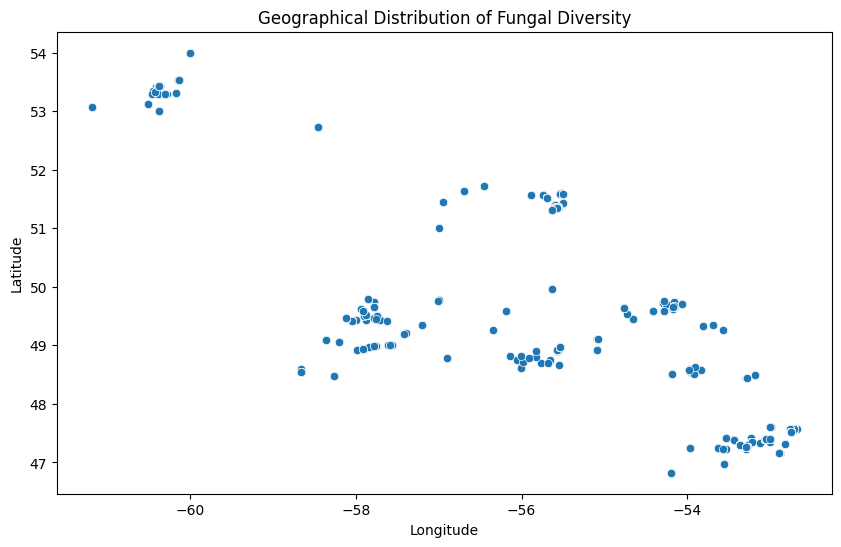

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data=data_filtered)
plt.title('Geographical Distribution of Fungal Diversity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


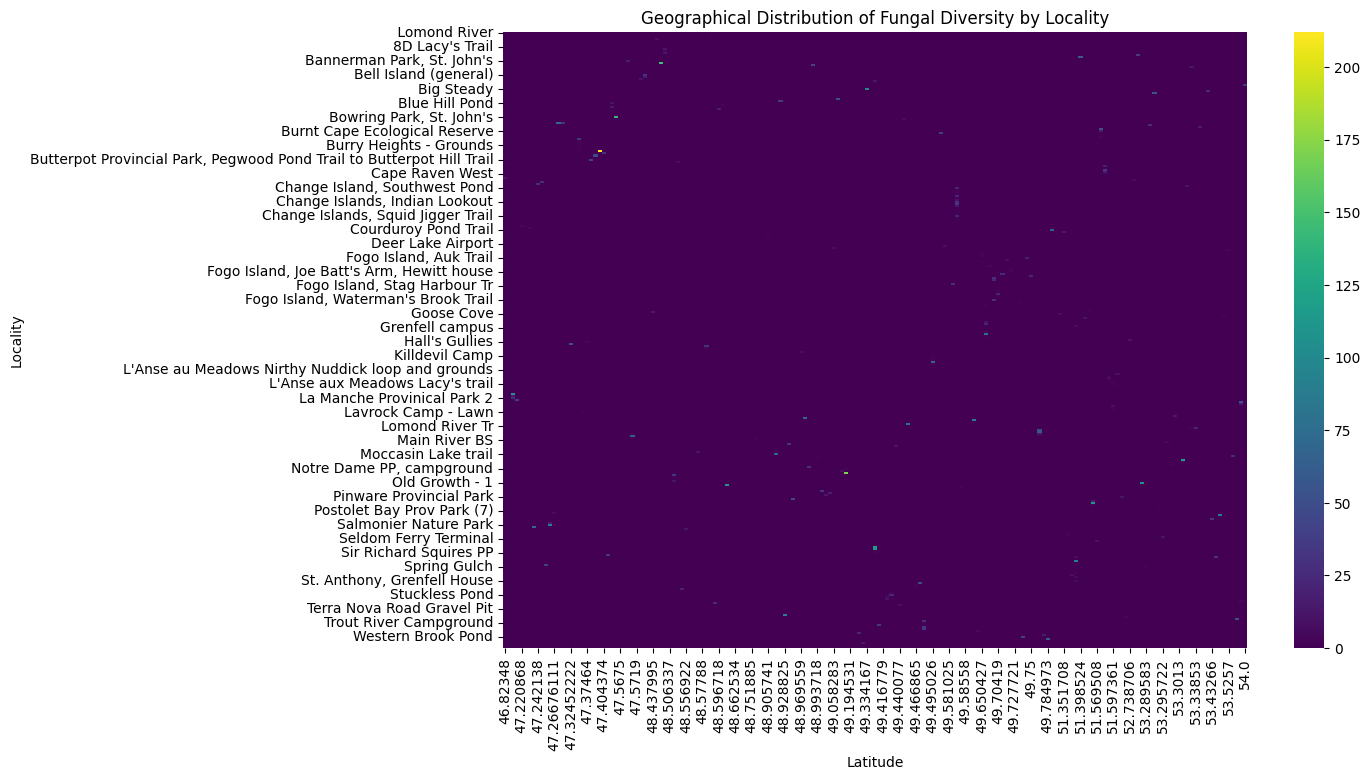

In [18]:
# Create a pivot table with locality and latitude
heatmap_data = data_filtered.pivot_table(index='locality', columns='decimalLatitude', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Geographical Distribution of Fungal Diversity by Locality')
plt.xlabel('Latitude')
plt.ylabel('Locality')
plt.show()


<Figure size 1200x800 with 0 Axes>

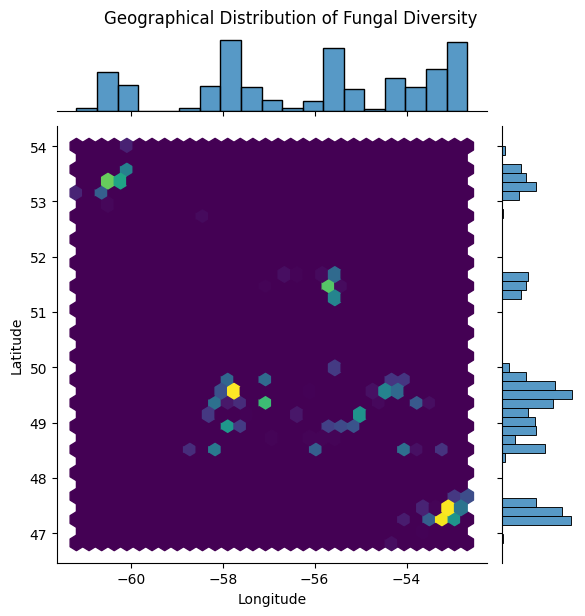

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a joint plot with hexbin for geographical distribution of fungal diversity
plt.figure(figsize=(12, 8))
joint = sns.jointplot(x='decimalLongitude', y='decimalLatitude', data=data_filtered, kind='hex', cmap='viridis')

# Set title outside the heatmap
joint.fig.suptitle('Geographical Distribution of Fungal Diversity', y=1.02)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [3]:
# import matplotlib.pyplot as plt

# # Calculate counts of each habitat type
# habitat_counts = data_filtered['habitat'].value_counts()

# # Create a pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(habitat_counts, labels=habitat_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Habitat Types')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()


/var/folders/3g/3_pn7ss90r1fk0jx_bm1yzl80000gn/T/ipykernel_1584/637374491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['habitat'] = data_filtered['habitat'].str.lower()
/var/folders/3g/3_pn7ss90r1fk0jx_bm1yzl80000gn/T/ipykernel_1584/637374491.py:24: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_habitats = selected_habitats.append(pd.Series({'Other': other_count}))


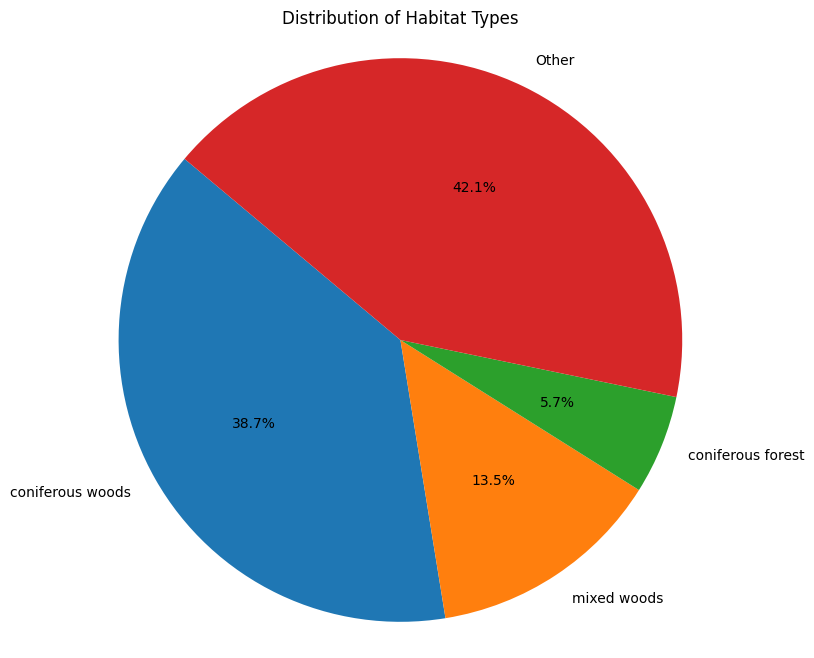

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Preprocess habitat names to make them uniform (convert to lowercase)
data_filtered['habitat'] = data_filtered['habitat'].str.lower()

# Calculate percentages of each habitat type
habitat_counts = data_filtered['habitat'].value_counts()

# Calculate total count of habitats
total_count = habitat_counts.sum()

# Calculate percentages of each habitat type
percentages = habitat_counts / total_count * 100

# Set a threshold percentage for habitat selection
threshold_percentage = 5

# Filter habitats based on threshold percentage
selected_habitats = percentages[percentages >= threshold_percentage]

# Combine selected habitats and "Other" category
other_count = percentages[percentages < threshold_percentage].sum()
sampled_habitats = selected_habitats.append(pd.Series({'Other': other_count}))

# Create a pie chart with the sampled data
plt.figure(figsize=(8, 8))
plt.pie(sampled_habitats, labels=sampled_habitats.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Habitat Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


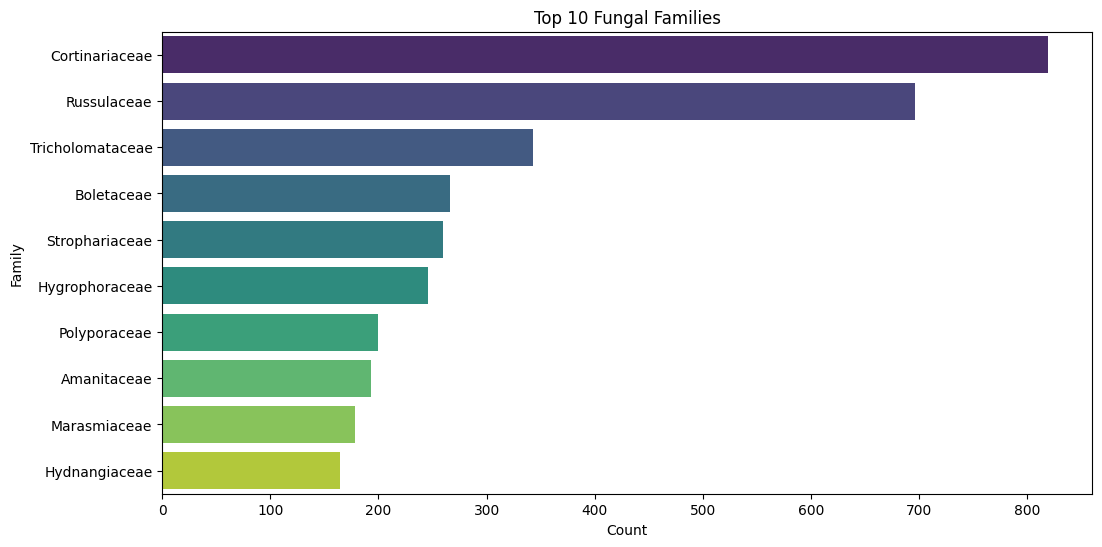

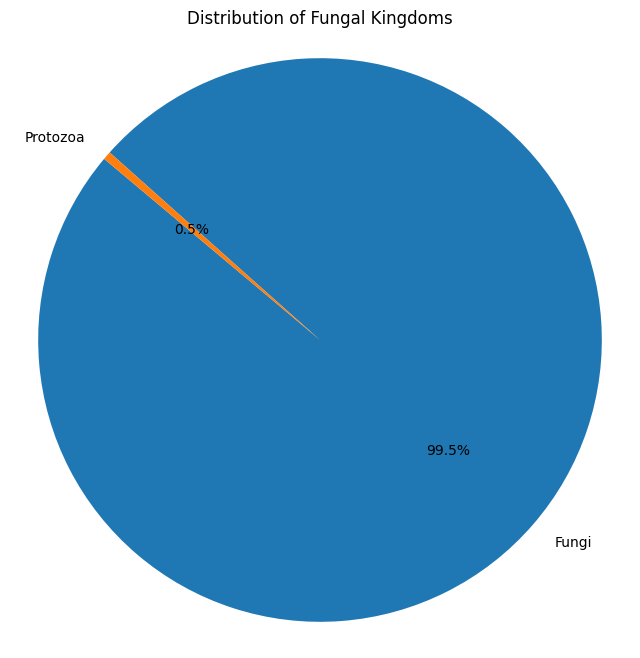

/var/folders/3g/3_pn7ss90r1fk0jx_bm1yzl80000gn/T/ipykernel_1495/1131024436.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_filtered.corr()


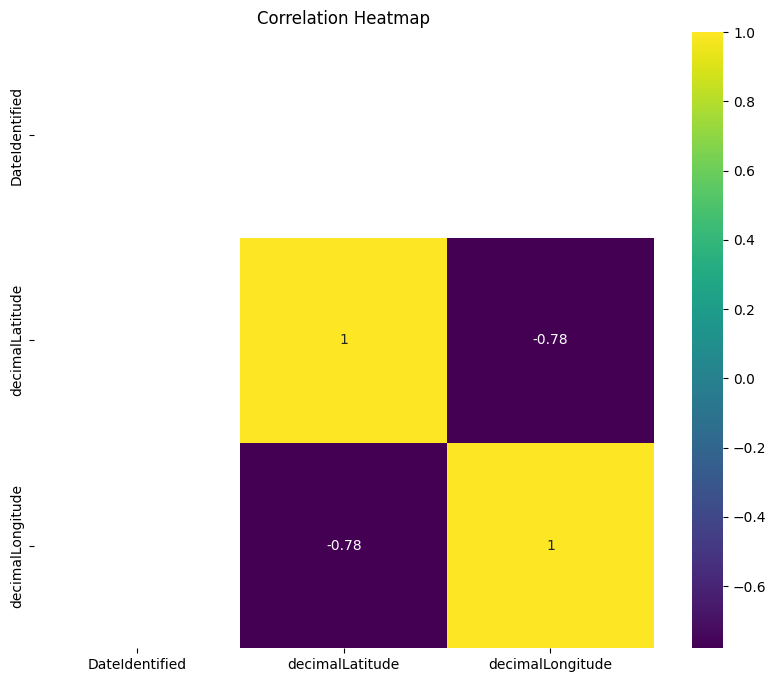

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Bar Plot of Family Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Family', data=data_filtered, palette='viridis', order=data_filtered['Family'].value_counts().index[:10])
plt.title('Top 10 Fungal Families')
plt.xlabel('Count')
plt.ylabel('Family')
plt.show()

# 4. Pie Chart of Kingdom Distribution
if 'Kingdom' in data_filtered.columns:
    plt.figure(figsize=(8, 8))
    kingdom_counts = data_filtered['Kingdom'].value_counts()
    plt.pie(kingdom_counts, labels=kingdom_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Fungal Kingdoms')
    plt.axis('equal')
    plt.show()
else:
    print("Column 'Kingdom' not found in the DataFrame.")

# 5. Heatmap of Correlation
plt.figure(figsize=(10, 8))
correlation_matrix = data_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### Objective-2: What do fungal diversity patterns look like in space and/or time?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Foray_NL.csv"  # Adjust the file path accordingly
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("\033[1;35mDataset Info:\033[0m")
print(data.info())

# Summary statistics
print("\n\033[1;35mSummary Statistics:\033[0m")
print(data.describe())

# Check for missing values
print("\n\033[1;35mMissing Values:\033[0m")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6158 entries, 0 to 6157
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbiota ID                     6158 non-null   int64  
 1   institutionCode(Collection)     6158 non-null   object 
 2   CollectionCode                  0 non-null      float64
 3   OwnerInstitutionCode            0 non-null      float64
 4   BasisOfRecord                   6158 non-null   object 
 5   OccurrenceID                    0 non-null      float64
 6   CatalogNumber                   6158 non-null   object 
 7   OtherCatalogNumbers             0 non-null      float64
 8   HigherClassification            5847 non-null   object 
 9   Kingdom                         5867 non-null   object 
 10  Phylum                          5866 non-null   object 
 11  Class                           5851 non-null   object 
 12  Order               

In [20]:
# Explore categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n\033[1;34m{'='*40}\033[0m\n\033[1;36mUnique values for {column}:\n{'-'*40}\033[0m")
    print(data[column].value_counts())



Unique values for institutionCode(Collection):
----------------------------------------
FNL    6158
Name: institutionCode(Collection), dtype: int64

Unique values for BasisOfRecord:
----------------------------------------
PreservedSpecimen    6158
Name: BasisOfRecord, dtype: int64

Unique values for CatalogNumber:
----------------------------------------
FI1-001        1
A18B-085       1
CBHV17C-068    1
CBHV17C-041    1
CBHV17A-504    1
              ..
TN6-018        1
TN6-017        1
TN6-015        1
TN6-013        1
MS9-171        1
Name: CatalogNumber, Length: 6158, dtype: int64

Unique values for HigherClassification:
----------------------------------------
Fungi|Basidiomycota|Agaricomycotina|Agaricomycetes|Agaricomycetidae|Agaricales|Cortinariaceae|Cortinarius          762
Fungi|Basidiomycota|Agaricomycotina|Agaricomycetes|Russulales|Russulaceae|Lactarius                                444
Fungi|Basidiomycota|Agaricomycotina|Agaricomycetes|Russulales|Russulaceae|Russula     

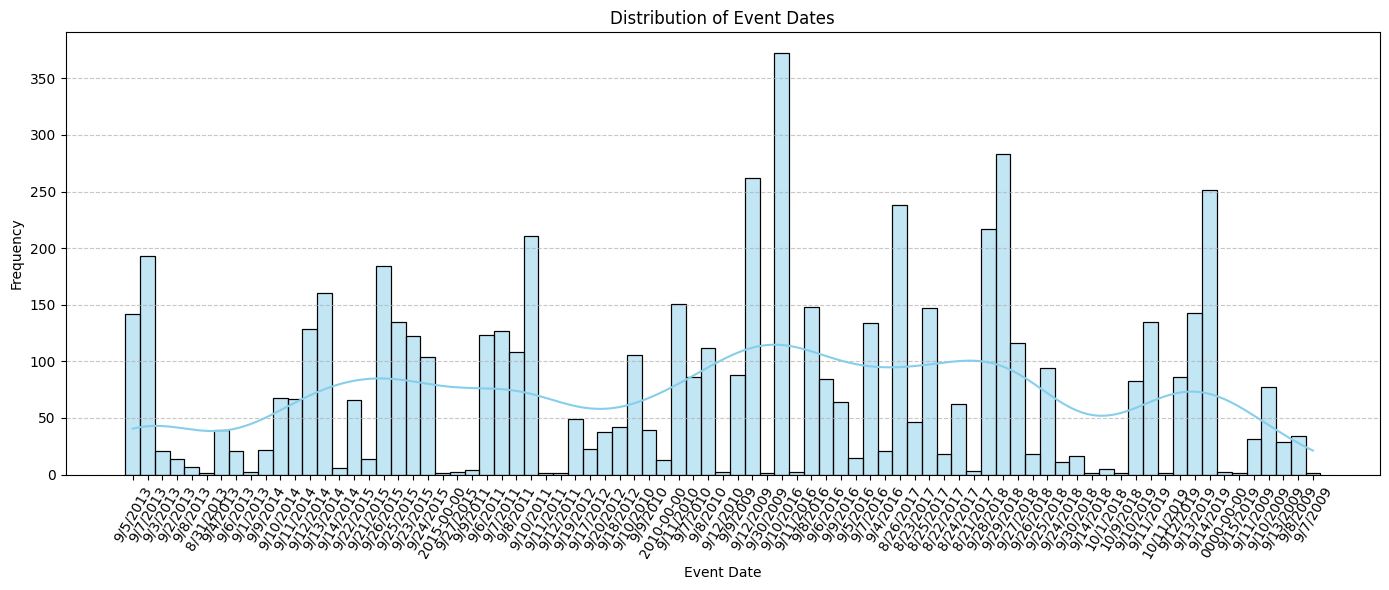

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of important variables
plt.figure(figsize=(14, 6))  # Increase figure width to accommodate rotated labels
sns.histplot(data['eventDate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Event Dates')
plt.xlabel('Event Date')
plt.ylabel('Frequency')
plt.xticks(rotation=60)  # Rotate x-axis labels further for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for reference
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



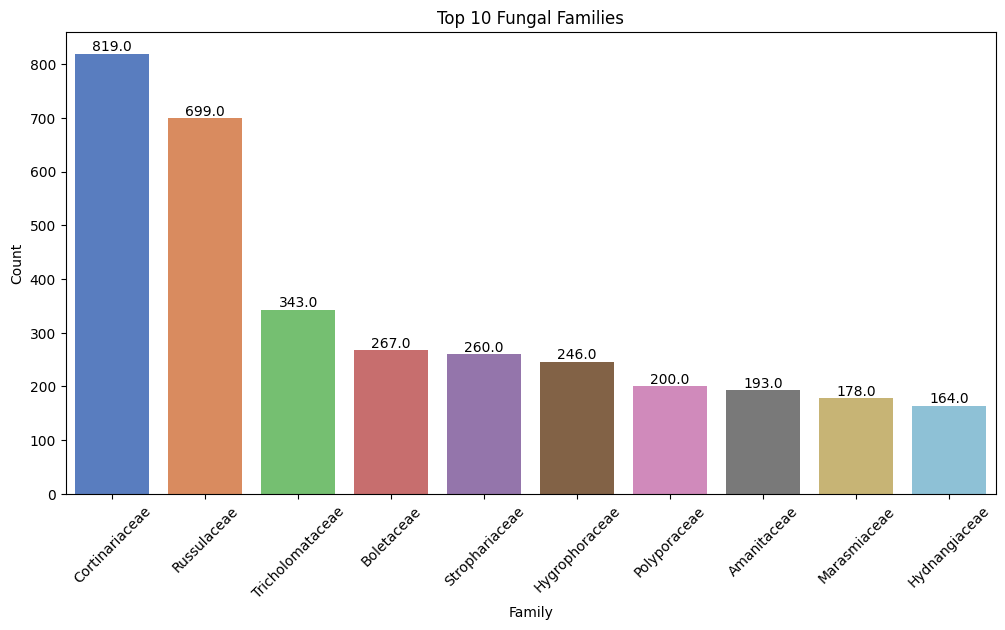

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot of top 10 fungal families
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Family', palette='muted', order=data['Family'].value_counts().index[:10])

# Add labels with values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Top 10 Fungal Families')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Objective-3: How similar or different is the diversity at the same locations in different years?

In [12]:
import pandas as pd

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Rename the Collector column
data.rename(columns={'institutionCode(Collection)': 'Collector'}, inplace=True)

# Display column names with separate lines
print("Column Names:")
print("=" * 20)
print(data.columns)

# Display main relevant column info with separate lines
print("\nMain Relevant Column Info:")
print("=" * 30)
relevant_columns = ['Collector', 'eventDate', 'locality', 'decimalLatitude', 'decimalLongitude', 'ScientificName']
print(data[relevant_columns].info())

Column Names:
Index(['Symbiota ID', 'Collector', 'CollectionCode', 'OwnerInstitutionCode',
       'BasisOfRecord', 'OccurrenceID', 'CatalogNumber', 'OtherCatalogNumbers',
       'HigherClassification', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family',
       'ScientificName', 'TaxonID', 'ScientificNameAuthorship', 'Genus',
       'Subgenus', 'SpecificEpithet', 'VerbatimTaxonRank',
       'InfraspecificEpithet', 'TaxonRank', 'IdentifiedBy', 'DateIdentified',
       'identificationReferences', 'identificationRemarks', 'taxonRemarks',
       'identificationQualifier', 'typeStatus', 'recordedBy',
       'associatedCollectors', 'recordNumber', 'eventDate', 'eventDate2',
       'year', 'month', 'day', 'startDayOfYear', 'endDayOfYear',
       'verbatimEventDate', 'occurrenceRemarks', 'habitat', 'substrate',
       'verbatimAttributes', 'fieldNumber', 'eventID', 'informationWithheld',
       'dataGeneralizations', 'dynamicProperties', 'associatedOccurrences',
       'associatedSequences', 'asso

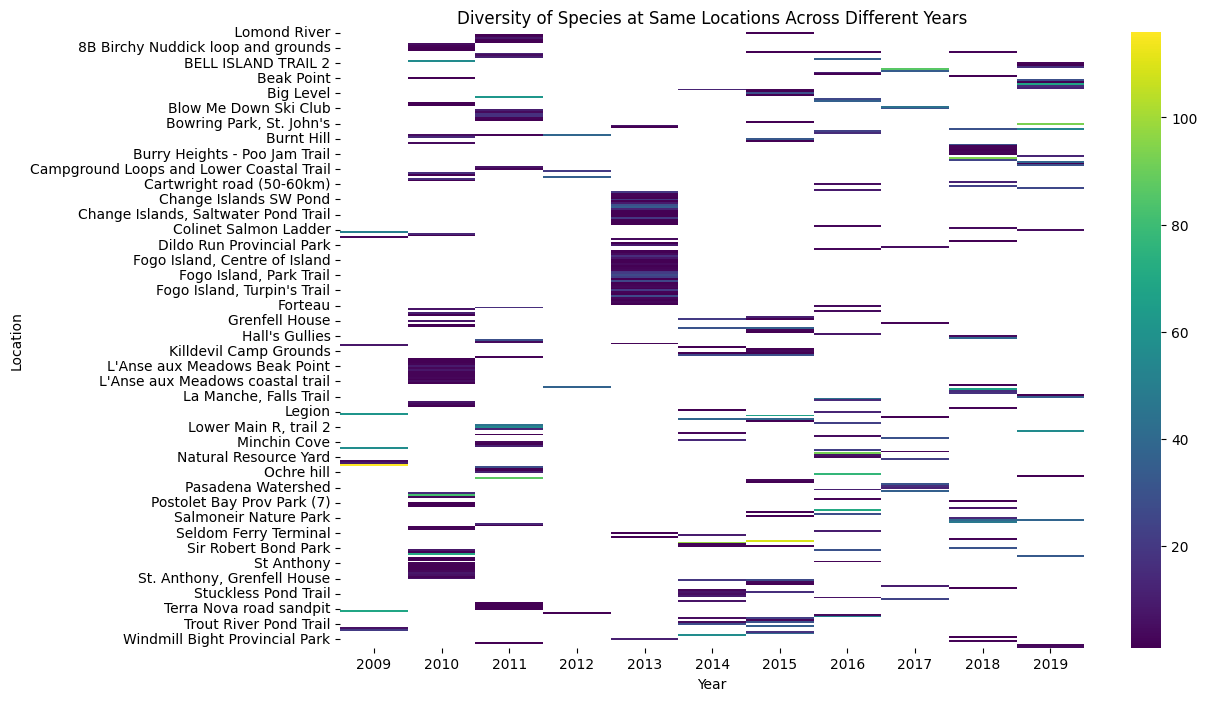

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Rename the Collector column
data.rename(columns={'institutionCode(Collection)': 'Collector'}, inplace=True)

# Extract relevant columns
relevant_columns = ['Collector', 'eventDate', 'locality', 'decimalLatitude', 'decimalLongitude', 'ScientificName']
data = data[relevant_columns]

# Filter out rows with invalid dates
data = data[pd.to_datetime(data['eventDate'], errors='coerce').notnull()]

# Convert eventDate to year
data['Year'] = pd.to_datetime(data['eventDate']).dt.year

# Group by location and year, count unique species
location_year_count = data.groupby(['locality', 'Year'])['ScientificName'].nunique().reset_index()

# Pivot the data to create a heatmap
heatmap_data = location_year_count.pivot(index='locality', columns='Year', values='ScientificName')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar=True)
plt.title('Diversity of Species at Same Locations Across Different Years')
plt.xlabel('Year')
plt.ylabel('Location')
plt.show()


### Applying Machine learning Classifier for Prediction:

<b>Among the three objectives, Objective 3: "How similar or different is the diversity at the same locations in different years?" seems to have the highest potential for applying supervised machine learning techniques for prediction. Here's why:</b>

1. **Clear Objective**: Objective 3 has a clear and specific goal of comparing diversity at the same locations but in different years. This lends itself well to supervised learning, where we can train models to predict or classify diversity levels based on historical data.

2. **Structured Data**: The data for this objective likely has a structured format, with features representing different locations and years and a target variable indicating diversity levels. Supervised learning algorithms perform well with structured data, making it easier to train predictive models.

3. **Predictive Modeling**: By framing the problem as a supervised learning task, we can apply various predictive modeling techniques to learn patterns in the data and make predictions about diversity levels for future years or locations.

4. **Evaluation Metrics**: For this objective, we can use evaluation metrics like mean squared error (MSE), root mean squared error (RMSE), or correlation coefficient (e.g., Pearson's r) to assess the performance of predictive models. These metrics provide insights into the accuracy and reliability of the predictions.

5. **Validation Techniques**: Cross-validation techniques, such as k-fold cross-validation or time-series cross-validation, can be used to validate the performance of predictive models and ensure that they generalize well to unseen data.

Based on these factors, Objective 3 offers a clear opportunity to apply supervised machine learning techniques for prediction and analysis of diversity patterns over time.


In [5]:
import pandas as pd

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Drop rows with missing or invalid 'eventDate' values
data = data.dropna(subset=['eventDate'])
invalid_dates = data[~data['eventDate'].str.match(r'\d{4}-\d{2}-\d{2}$')]
print("Rows with invalid 'eventDate' values:")
print("=" * 40)
print(invalid_dates)

# Convert 'eventDate' to datetime format
data['eventDate'] = pd.to_datetime(data['eventDate'], errors='coerce')

# Drop rows with NaT values (invalid dates after coercion)
data = data.dropna(subset=['eventDate'])

# Rename the Collector column
data.rename(columns={'institutionCode(Collection)': 'Collector'}, inplace=True)

# Display column names with separate lines
print("\nColumn Names:")
print("=" * 20)
print(data.columns)

# Display main relevant column info with separate lines
print("\nMain Relevant Column Info:")
print("=" * 30)
relevant_columns = ['Collector', 'eventDate', 'locality', 'decimalLatitude', 'decimalLongitude', 'ScientificName']
print(data[relevant_columns].info())


Rows with invalid 'eventDate' values:
      Symbiota ID institutionCode(Collection)  CollectionCode  \
0         3077805                         FNL             NaN   
1         3077806                         FNL             NaN   
2         3077807                         FNL             NaN   
3         3077808                         FNL             NaN   
4         3077809                         FNL             NaN   
...           ...                         ...             ...   
6157      3964494                         FNL             NaN   
6158      3964495                         FNL             NaN   
6159      3964496                         FNL             NaN   
6160      3964497                         FNL             NaN   
6161      3964498                         FNL             NaN   

      OwnerInstitutionCode      BasisOfRecord  OccurrenceID CatalogNumber  \
0                      NaN  PreservedSpecimen           NaN       FI1-001   
1                      NaN 

In [14]:
# Step 1: Load and Preprocess the Data (Random Forest Classifier)
import pandas as pd

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Assuming columns 'locality', 'year', and 'Family' are relevant
selected_columns = ['locality', 'year', 'Family']
data = data[selected_columns].dropna()  # Drop rows with missing values

# Step 2: Encode Categorical Features
data_encoded = pd.get_dummies(data, columns=['locality'])

# Step 3: Split the Data
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Family', axis=1)
y = data_encoded['Family']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a Supervised Learning Algorithm
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Step 5: Train the Model
# Train the model on the training data
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy to evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1614853195164076


In [15]:
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load and Preprocess the Data
import pandas as pd

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Assuming columns 'locality', 'year', and 'Family' are relevant
selected_columns = ['locality', 'year', 'Family']
data = data[selected_columns].dropna()  # Drop rows with missing values

# Step 2: Encode Categorical Features
data_encoded = pd.get_dummies(data, columns=['locality'])

# Step 3: Split the Data
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Family', axis=1)
y = data_encoded['Family']

# Step 4: Choose a Supervised Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Step 5: Perform Cross-Validation and Evaluate the Model
# Perform cross-validation and make predictions
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluate the model using classification report
report = classification_report(y, y_pred_cv)
print("Classification Report:\n", report)


Classification Report:
                            precision    recall  f1-score   support

              Agaricaceae       0.00      0.00      0.00       142
Agaricales Incertae sedis       0.00      0.00      0.00         1
           Albatrellaceae       0.00      0.00      0.00         9
              Amanitaceae       0.01      0.01      0.01       193
        Amphisphaeriaceae       0.17      0.50      0.25         2
        Amylocorticiaceae       0.00      0.00      0.00        18
             Ascobolaceae       0.00      0.00      0.00         2
              Atheliaceae       0.00      0.00      0.00        15
          Auriculariaceae       0.00      0.00      0.00        17
          Auriscalpiaceae       0.00      0.00      0.00         5
           Baeomycetaceae       0.00      0.00      0.00         1
              Bankeraceae       0.03      0.08      0.04        90
           Bionectriaceae       0.00      0.00      0.00         3
             Bolbitiaceae       0.02 

In [3]:
# Step 1: Load and Preprocess the Data
import pandas as pd

# Load the dataset
file_path = 'Foray_NL.csv'
data = pd.read_csv(file_path)

# Assuming columns 'locality', 'year', and 'Family' are relevant
selected_columns = ['locality', 'year', 'Family']
data = data[selected_columns].dropna()  # Drop rows with missing values

# Step 2: Encode Categorical Features
data_encoded = pd.get_dummies(data, columns=['locality'])

# Step 3: Split the Data
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Family', axis=1)
y = data_encoded['Family']

# Step 4: Choose a Supervised Learning Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Step 5: Perform Cross-Validation and Evaluate the Model
# Perform cross-validation and make predictions
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluate the model using classification report
report = classification_report(y, y_pred_cv)
print("Classification Report:\n", report)

# Compute confusion matrix
#conf_matrix = confusion_matrix(y, y_pred_cv)
#print("Confusion Matrix:\n", conf_matrix)


/Users/rajprajapati/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Classification Report:
                            precision    recall  f1-score   support

              Agaricaceae       0.00      0.00      0.00       142
Agaricales Incertae sedis       0.00      0.00      0.00         1
           Albatrellaceae       0.00      0.00      0.00         9
              Amanitaceae       0.01      0.01      0.01       193
        Amphisphaeriaceae       0.17      0.50      0.25         2
        Amylocorticiaceae       0.00      0.00      0.00        18
             Ascobolaceae       0.00      0.00      0.00         2
              Atheliaceae       0.00      0.00      0.00        15
          Auriculariaceae       0.00      0.00      0.00        17
          Auriscalpiaceae       0.00      0.00      0.00         5
           Baeomycetaceae       0.00      0.00      0.00         1
              Bankeraceae       0.03      0.08      0.04        90
           Bionectriaceae       0.00      0.00      0.00         3
             Bolbitiaceae       0.02 

/Users/rajprajapati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rajprajapati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rajprajapati/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
## Using linear regression (Extra ML classifier)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Load and Preprocess the Data
file_path = 'Foray_NL.csv'  # Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv(file_path)

# Assuming columns 'year', 'decimalLatitude', 'decimalLongitude', and 'Family' are relevant
selected_columns = ['year', 'decimalLatitude', 'decimalLongitude', 'Family']
data = data[selected_columns].dropna()  # Drop rows with missing values

from sklearn.preprocessing import LabelEncoder

# Step 2: Split the Data
X = data.drop(columns=['Family'])
y = data['Family']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'Family'
y_encoded = label_encoder.fit_transform(y)

# Split the encoded target variable into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation
model = LinearRegression()
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
mse = mean_squared_error(y_test_encoded, y_pred)
print("Mean Squared Error:", mse)

# Convert predicted continuous values back to categorical labels
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))

# Convert true target values to categorical labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Since F1-score is not directly applicable to regression, you can compute it for each class label
# It's important to note that this approach might not provide meaningful results
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1-score:", f1)



Mean Squared Error: 1697.05289534638
Accuracy: 0.013368983957219251
F1-score: 0.006653417175018281
